# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

1.Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 

In [3]:
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
pd.DataFrame(X).head()

,0,1,2,3
0,0.732811,0.072531,0.754313,0.777831
1,0.338448,0.187353,0.342561,0.131956
2,0.858309,0.258406,0.860777,0.535978
3,0.011438,0.739114,0.027379,0.472076
4,0.351688,0.592123,0.361021,0.834230


In [4]:
np.random.seed(25)
w = np.random.randn(4)
b = np.random.randn(1)

In [5]:
mse = []
for alpha in np.arange(0, 10, 0.1):
  w = np.linalg.inv(X.T @ X + alpha * np.identity(4)) @ X.T @ Y
  mse.append((((X @ w.T + b) - Y) ** 2).mean())

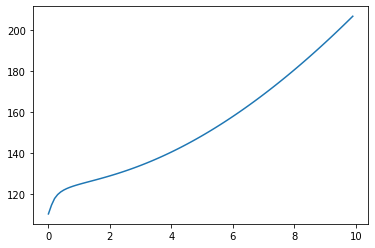

In [6]:
dx = np.arange(0, 10, 0.1)
plt.plot(dx, mse)

plt.show()

2.Подготовьте исходные данные для 5 fold CV.

In [7]:
import random
random.seed(25)

In [8]:
def KFold_split(size, num):
  kfolds = []
  fold_size = size // num
  wh = np.arange(size)
  for i in range(num):
    index = np.random.choice(wh, fold_size, replace=False)
    kfolds.append([index])
    id_del = [np.where(wh == j) for j in index]
    wh = np.delete(wh, id_del)
  
  train = []
  test = []
  cross_val={'train': train, 'test': test}
  for i, testi in enumerate(kfolds):
    train.append(kfolds[:i] + kfolds[i+1:])
    test.append(testi)
    
  return cross_val

In [9]:
kfold = KFold_split(1000, 5)

3.С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.


In [10]:
import itertools

In [11]:
alpha_best = {}

mse_train = []
mse_test = []

for alpha in np.arange(0, 20, 0.1):

  w = np.random.randn(4)
  b = np.random.randn(1)
  mse_f = []

  for j in range(5):
    
    tr_ind = np.concatenate(list(itertools.chain.from_iterable(kfold['train'][j])))
    x_test = X[kfold['test'][j], :]
    y_test = Y[kfold['test'][j]]
    x_train = X[tr_ind, :]
    y_train = Y[tr_ind]

    w = np.linalg.inv(x_train.T @ x_train + alpha * np.identity(4)) @ x_train.T @ y_train
    
    mse_f.append((((x_test @ w.T + b) - y_test) ** 2).mean())


  alpha_best[alpha] = np.array(mse_f).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [12]:
print(f'best alpha: {min(alpha_best, key=alpha_best.get)}')

best alpha: 0.1


4.Постройте валидационную кривую. 

In [13]:
mse_tr = []
mse_tst = []

w = np.random.randn(4)
b = np.random.randn(1)

for alpha in np.arange(0, 20, 0.1):

  
  tr_ind = np.concatenate(list(itertools.chain.from_iterable(kfold['train'][0])))
  x_test = X[kfold['test'][0], :]
  y_test = Y[kfold['test'][0]]
  x_train = X[tr_ind, :]
  y_train = Y[tr_ind]

  w = np.linalg.inv(x_train.T @ x_train + alpha * np.identity(4)) @ x_train.T @ y_train
    
  mse_tr.append((((x_train @ w.T + b) - y_train) ** 2).mean())

  mse_tst.append((((x_test @ w.T + b) - y_test) ** 2).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


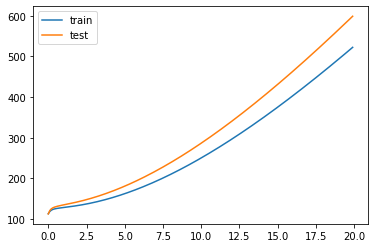

In [14]:
dx = np.arange(0, 20, 0.1)
plt.plot(dx, mse_tr, label='train')
plt.plot(dx, mse_tst, label='test')
plt.legend()

plt.show()

5.Постройте кривую обучения.

In [15]:
mse_tr = []
mse_tst = []
alpha = 0.01

w = np.random.randn(4)
b = np.random.randn(1)
tr_ind = np.concatenate(list(itertools.chain.from_iterable(kfold['train'][1])))

for i in range(1, 9):

  x_test = X[kfold['test'][1], :]
  y_test = Y[kfold['test'][1]]
  x_train = X[tr_ind[:i * 100], :]
  y_train = Y[tr_ind[:i * 100]]

  w = np.linalg.inv(x_train.T @ x_train + alpha * np.identity(4)) @ x_train.T @ y_train
    
  mse_tr.append((((x_train @ w.T + b) - y_train) ** 2).mean())

  mse_tst.append((((x_test @ w.T + b) - y_test) ** 2).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


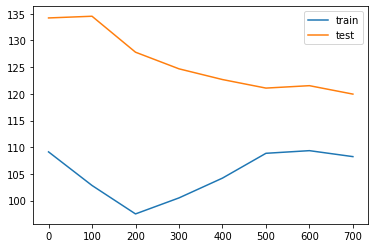

In [16]:
dx = np.arange(0, 800, 100)
plt.plot(dx, mse_tr, label='train')
plt.plot(dx, mse_tst, label='test')
plt.legend()

plt.show()